In [77]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys
import sklearn

imagem lida


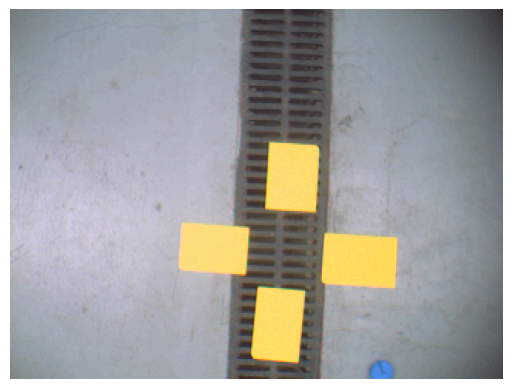

In [78]:
img = cv.imread('yellowtargets.png')

if img is None:
    print("nao foi possivel ler a imagem")
else:
    print("imagem lida")

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

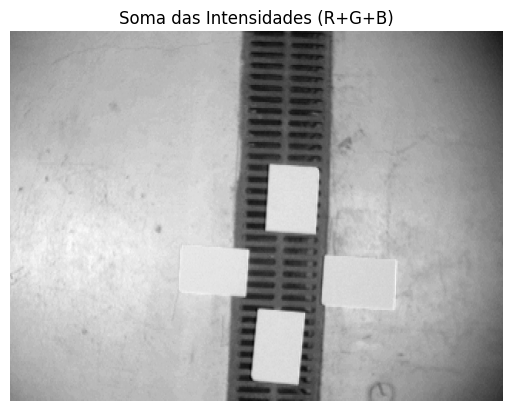

In [79]:
img_float = img.astype(np.float64) / 255.0
soma_canais = img_float.sum(axis=2)

plt.imshow(soma_canais, cmap='gray')
plt.title("Soma das Intensidades (R+G+B)")
plt.axis('off')
plt.show()

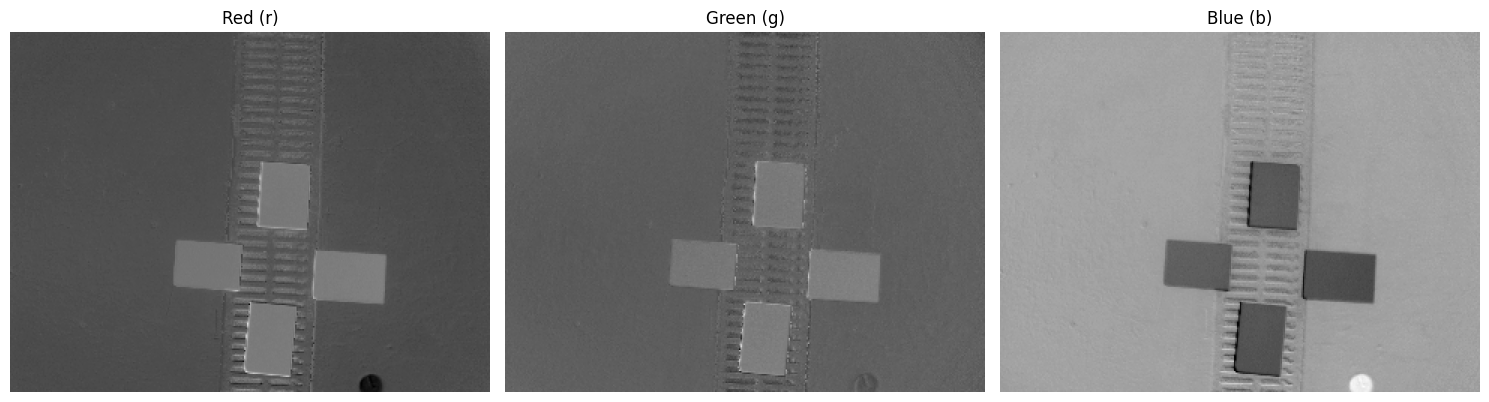

In [80]:
soma = img.sum(axis=2, keepdims=True) + 1e-5

img_norm = img / soma

b, g, r = cv.split(img_norm)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax1.imshow(r, cmap='gray')
ax1.set_title('Red (r)')
ax1.axis('off')

ax2.imshow(g, cmap='gray')
ax2.set_title('Green (g)')
ax2.axis('off')

ax3.imshow(b, cmap='gray')
ax3.set_title('Blue (b)')
ax3.axis('off')

plt.tight_layout()
plt.show()

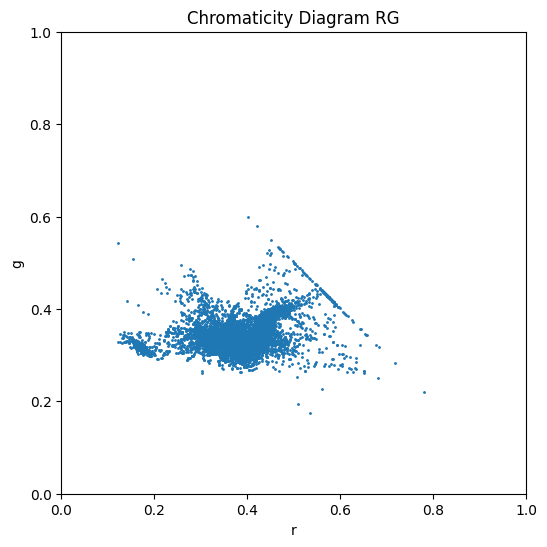

In [81]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(r.ravel(), g.ravel(), s=0.6)
ax.set(xlim=(0, 1),
       ylim=(0, 1),
       xlabel='r',
       ylabel='g',
       title='Chromaticity Diagram RG')

plt.show()

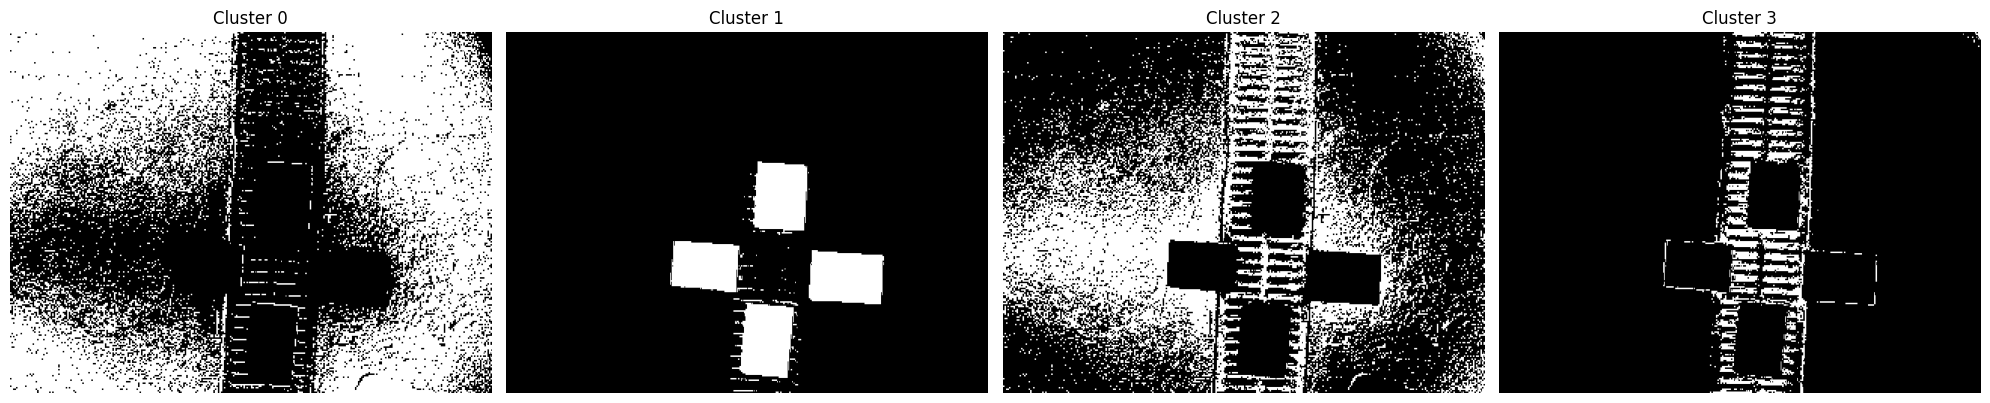

In [82]:
labels_img = kmeans.labels_.reshape(img.shape[:2])

fig, axs = plt.subplots(nrows=1, ncols=k, figsize=(20, 5))

for i, ax in enumerate(axs):
    mask = (labels_img == i).astype(np.uint8) * 255

    ax.imshow(mask, cmap='gray')
    ax.set_title(f'Cluster {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()

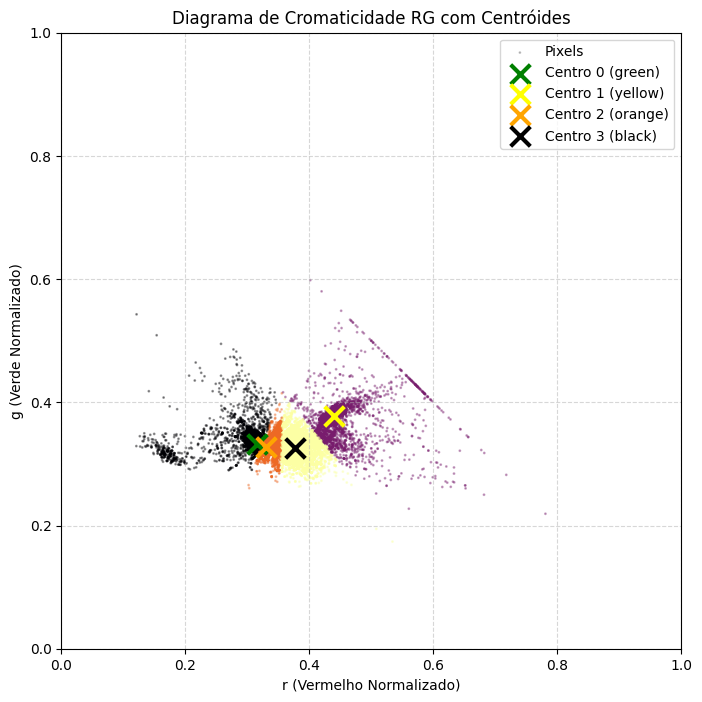

In [83]:
center_colors = ['green', 'yellow', 'orange', 'black']

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(r.ravel(), g.ravel(), c=labels, s=1, cmap='inferno', alpha=0.2, label='Pixels')

for i, (centroid, color) in enumerate(zip(center, center_colors)):
    cx, cy = centroid
    ax.scatter(cx, cy, c=color, marker='x', s=200, linewidths=3, label=f'Centro {i} ({color})')

ax.set(xlim=(0, 1), ylim=(0, 1),
       xlabel='r (Vermelho Normalizado)',
       ylabel='g (Verde Normalizado)',
       title='Diagrama de Cromaticidade RG com Centróides')

ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(loc='upper right')

plt.show()

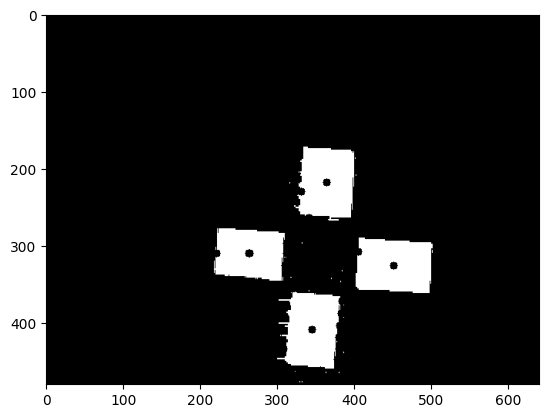

In [84]:
yellow = binary_img[1]
contours, hierarchy = cv.findContours(yellow, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for c in contours:
    M = cv.moments(c)
    if M['m00'] != 0:
        cX = int(M['m10']/M['m00'])
        cY = int(M['m01']/M['m00'])
    else:
        cX, cY = 0, 0

    cv.circle(img = yellow, center = (cX, cY), radius = 5, color = 0, thickness = -1)

plt.imshow(yellow, cmap = 'gray')
plt.show()